In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
import os

In [25]:
files = [file for file in sorted(os.listdir("./Sales_Data"))]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

#### Merging all csv files

In [27]:
all_months = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months = pd.concat([all_months, df], ignore_index=True)
all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [31]:
all_months.to_csv("all_data.csv", index=False)

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning up the data

In [4]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
nan_df = df[df.isnull().any(axis=1)]
nan_df
# found the rows that are null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop the NaN values, since whole rows are null
df = df.dropna(how="any")

#### Deleting "or" in Order Date column

In [5]:
df[df["Order Date"] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
df = df[df["Order Date"].str[:2] != "Or"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Adding Month column

In [8]:
import calendar
df["Month"] = df["Order Date"].str[:2]
df["Month"] = df["Month"].astype("int32")
df["Month"] = df["Month"].apply(lambda x: calendar.month_name[x])
month_order = list(calendar.month_name)[1:]
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April


#### Converting column types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Order ID          185950 non-null  object  
 1   Product           185950 non-null  object  
 2   Quantity Ordered  185950 non-null  object  
 3   Price Each        185950 non-null  object  
 4   Order Date        185950 non-null  object  
 5   Purchase Address  185950 non-null  object  
 6   Month             185950 non-null  category
dtypes: category(1), object(6)
memory usage: 10.1+ MB


In [11]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Order ID          185950 non-null  object  
 1   Product           185950 non-null  object  
 2   Quantity Ordered  185950 non-null  int64   
 3   Price Each        185950 non-null  float64 
 4   Order Date        185950 non-null  object  
 5   Purchase Address  185950 non-null  object  
 6   Month             185950 non-null  category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 10.1+ MB


#### Adding sales column

In [12]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.2+ MB


In [98]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA"


#### Best month for sales

In [13]:
month_results = df.groupby("Month").agg({"Sales": "sum"})
month_order = list(calendar.month_name)[1:]
month_results = month_results.reindex(month_order)
month_results

,Sales
Month,
January,1822256.73
February,2202022.42
March,2807100.38
April,3390670.24
May,3152606.75
June,2577802.26
July,2647775.76
August,2244467.88
September,2097560.13


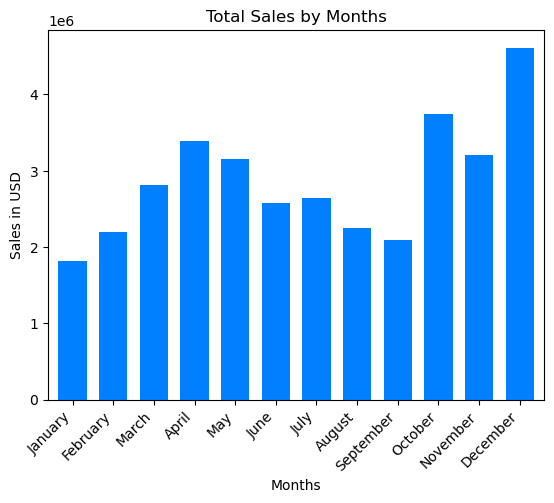

In [66]:
month_results.plot(kind="bar", xlabel="Months", ylabel="Sales in USD", legend=False, width=0.7, color="#007fff")
plt.title("Total Sales by Months")
plt.xticks(rotation=45, ha="right")
plt.show()

#### City with the highest number of sales

In [37]:
df["Purchase Address"].value_counts()

193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
197 Center St, San Francisco, CA 94016    7
727 9th St, San Francisco, CA 94016       7
                                         ..
414 Sunset St, Los Angeles, CA 90001      1
191 Wilson St, Atlanta, GA 30301          1
359 Meadow St, New York City, NY 10001    1
703 Highland St, Dallas, TX 75001         1
220 12th St, San Francisco, CA 94016      1
Name: Purchase Address, Length: 140787, dtype: int64

#### Adding City column

In [14]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1].strip() + ", " + x.split(",")[2].strip()[:2])
df["City"].value_counts()

San Francisco, CA    44732
Los Angeles, CA      29605
New York City, NY    24876
Boston, MA           19934
Atlanta, GA          14881
Dallas, TX           14820
Seattle, WA          14732
Portland, OR         10010
Austin, TX            9905
Portland, ME          2455
Name: City, dtype: int64

In [15]:
city_results = df.groupby("City").agg({"Sales": sum})
city_results

,Sales
City,
"Atlanta, GA",2795498.58
"Austin, TX",1819581.75
"Boston, MA",3661642.01
"Dallas, TX",2767975.40
"Los Angeles, CA",5452570.80
"New York City, NY",4664317.43
"Portland, ME",449758.27
"Portland, OR",1870732.34
"San Francisco, CA",8262203.91


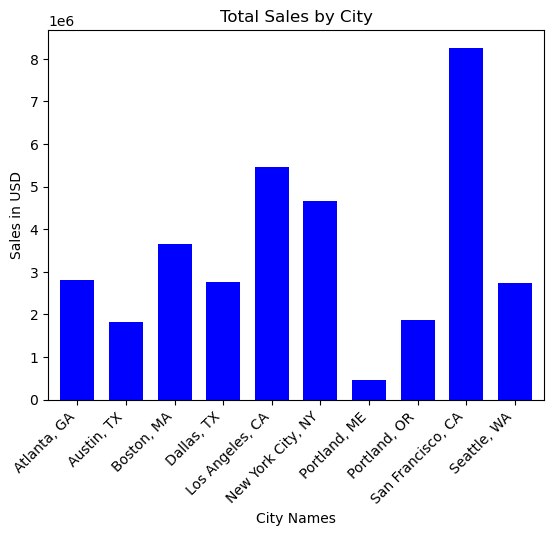

In [67]:
city_results.plot(kind="bar", ylabel="Sales in USD", xlabel="City Names", legend=False, width=0.7, color="#0000ff")
plt.title("Total Sales by City")
plt.xticks(rotation=45, ha="right")
plt.show()

#### Best time to display advertisements to maximize likelihood of customer's buying the products

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Purchase Address  185950 non-null  object        
 3   City              185950 non-null  object        
 4   Quantity Ordered  185950 non-null  int64         
 5   Price Each        185950 non-null  float64       
 6   Sales             185950 non-null  float64       
 7   Order Date        185950 non-null  datetime64[ns]
 8   Month             185950 non-null  object        
 9   Day of Week       185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 21.1+ MB


#### Adding new columns to analyze and reorder the columns in the dataframe

In [16]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [17]:
df["Day of Week"] = df["Order Date"].dt.day_name()
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute

In [18]:
desired_order = ["Order ID", "Product", "Purchase Address", "City", "Quantity Ordered", "Price Each", "Sales", 
                 "Order Date", "Month", "Day of Week", "Hour", "Minute"]
df = df[desired_order]
df.head()

,Order ID,Product,Purchase Address,City,Quantity Ordered,Price Each,Sales,Order Date,Month,Day of Week,Hour,Minute
0,176558,USB-C Charging Cable,"917 1st St, Dallas, TX 75001","Dallas, TX",2,11.95,23.90,2019-04-19 08:46:00,April,Friday,8,46
2,176559,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215","Boston, MA",1,99.99,99.99,2019-04-07 22:30:00,April,Sunday,22,30
3,176560,Google Phone,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",1,600.00,600.00,2019-04-12 14:38:00,April,Friday,14,38
4,176560,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",1,11.99,11.99,2019-04-12 14:38:00,April,Friday,14,38
5,176561,Wired Headphones,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA",1,11.99,11.99,2019-04-30 09:27:00,April,Tuesday,9,27


#### Analyzing Sales by Month

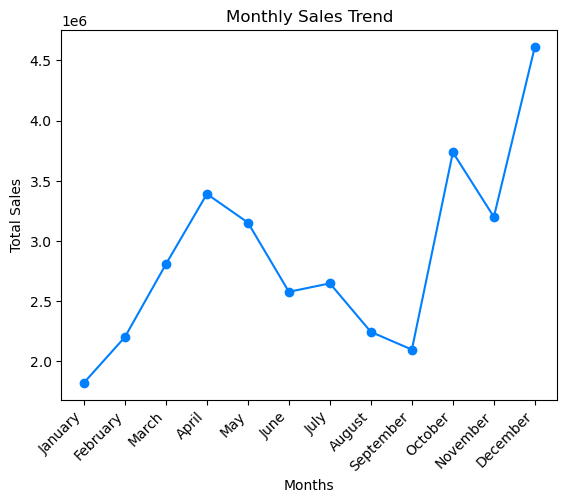

In [65]:
plt.plot(month_results.index.tolist(), month_results["Sales"].tolist(), marker='o', linestyle='-', color="#007fff")

plt.title("Monthly Sales Trend")
plt.xlabel("Months")
plt.ylabel("Total Sales")

plt.xticks(rotation=45, ha="right")

plt.show()

#### Analyzing Sales by Day

In [24]:
daily_sales = df.groupby("Day of Week").agg({"Sales": "sum"})
day_order = list(calendar.day_name)
daily_sales = daily_sales.reindex(day_order)
daily_sales

,Sales
Day of Week,
Monday,4883326.72
Tuesday,5087956.78
Wednesday,4988822.26
Thursday,4839465.16
Friday,4855938.38
Saturday,4904357.01
Sunday,4932169.66


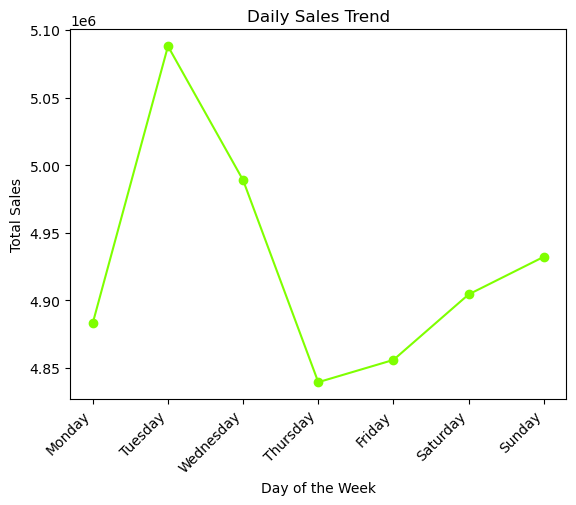

In [64]:
plt.plot(daily_sales.index.tolist(), daily_sales["Sales"].tolist(), marker='o', linestyle='-', color="#7fff00")

plt.title("Daily Sales Trend")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")

plt.xticks(rotation=45, ha="right")

plt.show()

In [ ]:
# peak day of sales is Tuesday while Thursday exhibits the lowest sales

#### Analyzing Sales by Hour

In [19]:
hourly_sales = df.groupby("Hour").agg({"Sales": "sum"})
hourly_sales

,Sales
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


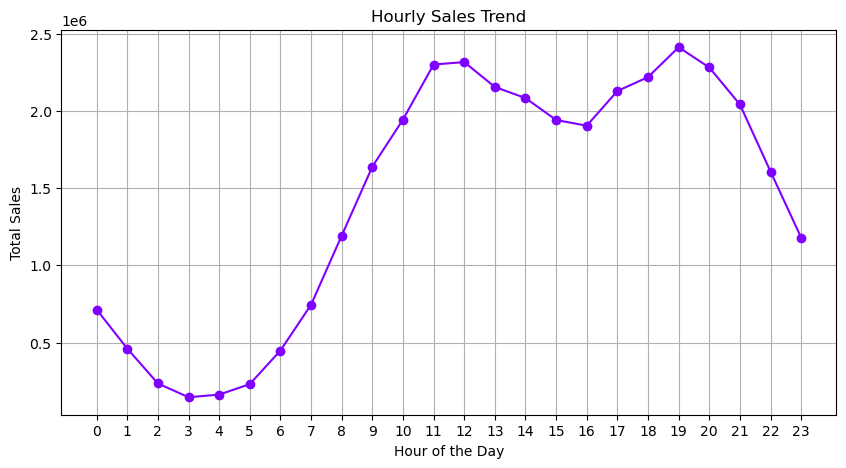

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o", color="#8000ff")
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [21]:
# peak hours of sales was 7 pm followed by 12 and 11 am

#### Products that are purchased together

In [23]:
id_df = df[df["Order ID"].duplicated(keep=False)]
id_df.head()

,Order ID,Product,Purchase Address,City,Quantity Ordered,Price Each,Sales,Order Date,Month,Day of Week,Hour,Minute
3,176560,Google Phone,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",1,600.00,600.00,2019-04-12 14:38:00,April,Friday,14,38
4,176560,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",1,11.99,11.99,2019-04-12 14:38:00,April,Friday,14,38
18,176574,Google Phone,"20 Hill St, Los Angeles, CA 90001","Los Angeles, CA",1,600.00,600.00,2019-04-03 19:42:00,April,Wednesday,19,42
19,176574,USB-C Charging Cable,"20 Hill St, Los Angeles, CA 90001","Los Angeles, CA",1,11.95,11.95,2019-04-03 19:42:00,April,Wednesday,19,42
30,176585,Bose SoundSport Headphones,"823 Highland St, Boston, MA 02215","Boston, MA",1,99.99,99.99,2019-04-07 11:31:00,April,Sunday,11,31
31,176585,Bose SoundSport Headphones,"823 Highland St, Boston, MA 02215","Boston, MA",1,99.99,99.99,2019-04-07 11:31:00,April,Sunday,11,31
32,176586,AAA Batteries (4-pack),"365 Center St, San Francisco, CA 94016","San Francisco, CA",2,2.99,5.98,2019-04-10 17:00:00,April,Wednesday,17,0
33,176586,Google Phone,"365 Center St, San Francisco, CA 94016","San Francisco, CA",1,600.00,600.00,2019-04-10 17:00:00,April,Wednesday,17,0
119,176672,Lightning Charging Cable,"778 Maple St, New York City, NY 10001","New York City, NY",1,14.95,14.95,2019-04-12 11:07:00,April,Friday,11,7
120,176672,USB-C Charging Cable,"778 Maple St, New York City, NY 10001","New York City, NY",1,11.95,11.95,2019-04-12 11:07:00,April,Friday,11,7


In [26]:
id_df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

id_df = id_df[["Order ID", "Grouped"]].drop_duplicates()

id_df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [70]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in id_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

pair_counts = count.most_common(10)

print("Most common pairs of items:")
for pair, counts in pair_counts:
    print(f"{pair}: {counts}")

Most common pairs of items:
('iPhone', ' Lightning Charging Cable'): 1005
('Google Phone', ' USB-C Charging Cable'): 987
('iPhone', ' Wired Headphones'): 447
('Google Phone', ' Wired Headphones'): 414
('Vareebadd Phone', ' USB-C Charging Cable'): 361
('iPhone', ' Apple Airpods Headphones'): 360
('Google Phone', ' Bose SoundSport Headphones'): 220
('Vareebadd Phone', ' Wired Headphones'): 143
(' USB-C Charging Cable', ' Wired Headphones'): 120
('Vareebadd Phone', ' Bose SoundSport Headphones'): 80


#### Most sold product

In [83]:
quantities = df.groupby("Product").agg({"Quantity Ordered": "sum"})
sorted_quantities = quantities.sort_values(by="Quantity Ordered", ascending=False)
sorted_quantities

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


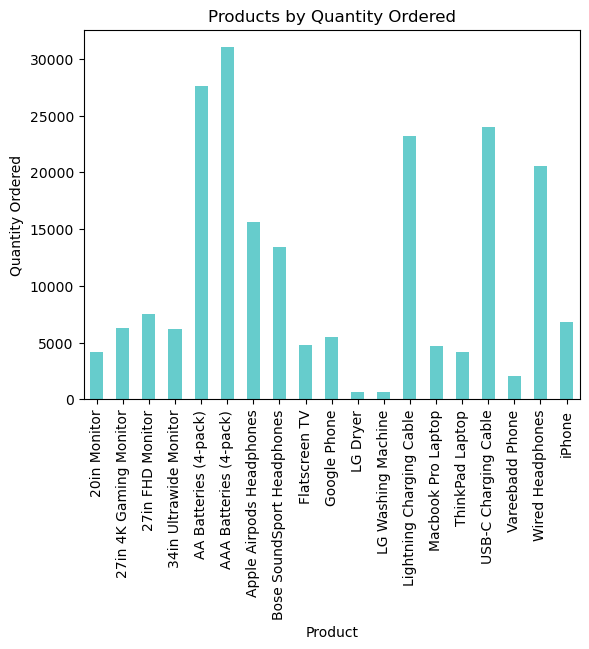

In [93]:
quantities.plot(kind="bar", legend=False, color="#66CCCC")
plt.title("Products by Quantity Ordered")
plt.ylabel("Quantity Ordered")
plt.show()

#### Analyze price's influence

In [91]:
prices = df.groupby("Product").agg({"Price Each": "mean"})
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


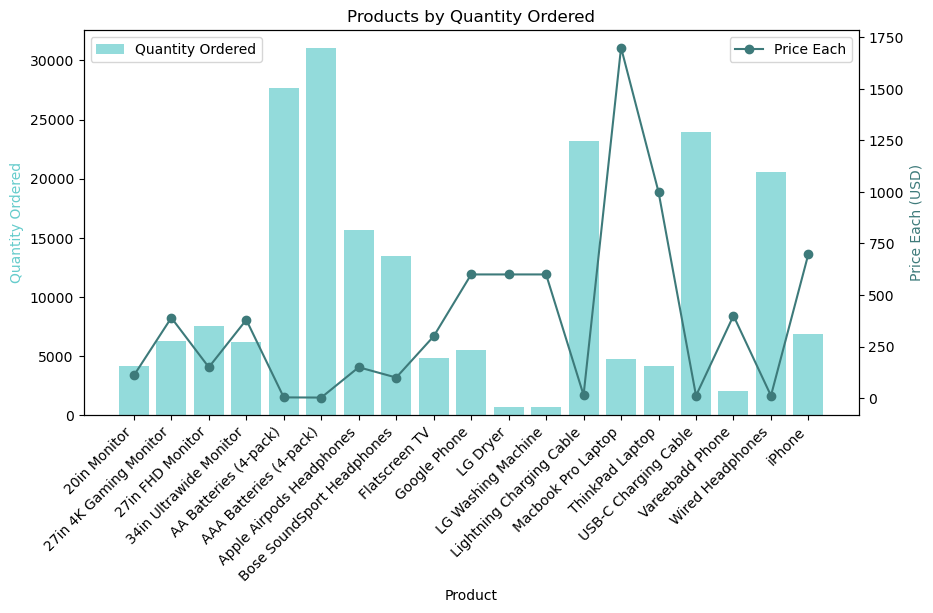

In [116]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(quantities.index, quantities["Quantity Ordered"], color="#66CCCC", alpha=0.7, label="Quantity Ordered")
ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered", color="#66CCCC")
ax1.set_title('Products by Quantity Ordered')
plt.xticks(rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.plot(quantities.index, prices["Price Each"], color="#3D7A7A", marker='o', label="Price Each")
ax2.set_ylabel("Price Each (USD)", color="#3D7A7A")


ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [ ]:
# It can be observed that higher product prices correlate with lower quantities ordered, and vice versa.